# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [241]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [242]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=['NaN'])

In [243]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [244]:
df.shape

(30000, 15)

In [245]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a pet dog licensed in New York. Animal Name is the name of the dog. Vaccinated is whether the dog is vaccinated or not.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. What percentage of dogs born before 2010 are vaccinated compared to those born after 2010?

2. Which breed is least likely to be spayed or neutered? Most likely?

3. Which owner zip codes take the longest to process dog license applications?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

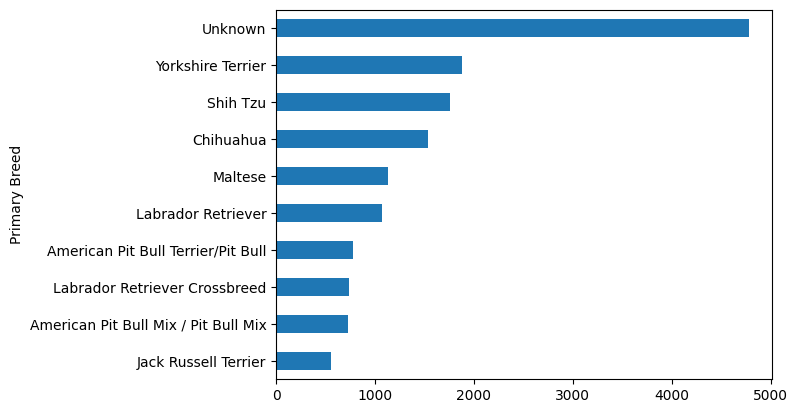

In [246]:
popular_breeds = df.groupby('Primary Breed')['Primary Breed'].count().sort_values(ascending=False).head(10)
popular_breeds[::-1].plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [247]:
topbreeds_exc_unk = df[df['Primary Breed'] != 'Unknown']

<Axes: ylabel='Primary Breed'>

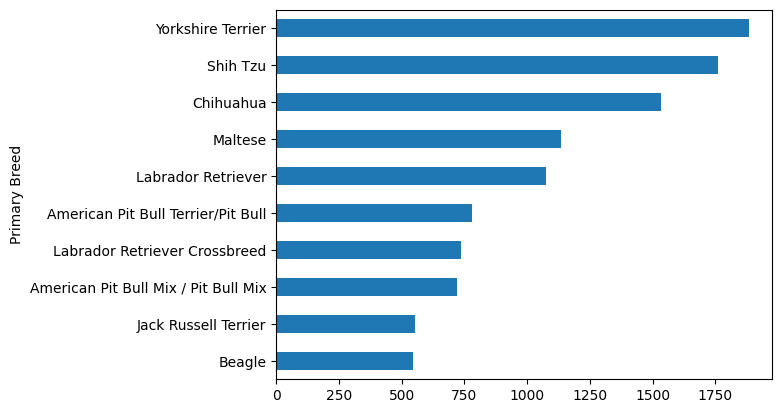

In [248]:
topbreeds_exc_unk.groupby('Primary Breed')['Primary Breed'].count().sort_values(ascending=False).head(10)[::-1].plot(kind="barh")

## What are the most popular dog names?

In [249]:
df.groupby('Animal Name')["Animal Name"].count().sort_values(ascending=False).head(10)

Animal Name
UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [250]:
df[df['Animal Name'].str.contains("^annika$", case=False, regex=True, na=False)]['Animal Name'].count()

np.int64(0)

:(

In [251]:
df[df['Animal Name'].str.contains("^max$", case=False, regex=True, na=False)]['Animal Name'].count()

np.int64(256)

In [252]:
df[df['Animal Name'].str.contains("^maxwell$", case=False, regex=True, na=False)]['Animal Name'].count()

np.int64(13)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [253]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

.086%

## What are the actual numbers?

In [254]:
df.groupby('Guard or Trained')['Guard or Trained'].count()

Guard or Trained
No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [255]:
df.groupby('Guard or Trained')['Guard or Trained'].count().sum()

np.int64(19826)

In [256]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [257]:
df['Guard or Trained'] = df['Guard or Trained'].fillna("No")

In [258]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

In [259]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999433
Yes    0.000567
Name: proportion, dtype: float64

## What are the top dog breeds for guard dogs? 

In [260]:
(
    df[(df['Guard or Trained'] == "Yes") & (df['Primary Breed'] != 'Unknown')]
    .groupby('Primary Breed')
    ['Primary Breed'].count()
    .sort_values(ascending=False)
    .head(10)
)

Primary Breed
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
Labrador Retriever            1
Poodle, Standard              1
Rottweiler                    1
Schnauzer, Miniature          1
Shih Tzu                      1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [261]:
df['Animal Birth'].dt.year

0        2007
1        2013
2        2014
3        2008
4        2014
         ... 
29995    2010
29996    2010
29997    2014
29998    2009
29999    2012
Name: Animal Birth, Length: 30000, dtype: int32

In [262]:
df['Birth Year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Birth Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [263]:
df['Age'] = 2024 - df['Birth Year']
df['Age'].mean().round(2)

np.float64(14.71)

# Joining data together

In [264]:
df_nyczip = pd.read_csv("zipcodes-neighborhoods.csv")

In [265]:
df_nyczip.dtypes

neighborhood    object
zip              int64
borough         object
dtype: object

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [266]:
df_merged = df.merge(df_nyczip, left_on='Owner Zip Code', right_on='zip', how='left')

In [267]:
df_merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Birth Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [268]:
(
    df_merged[df_merged['borough'] == "Bronx"]
    .groupby('Animal Name')
    ['Animal Name'].count()
    .sort_values(ascending=False)
)

Animal Name
Bella            22
Max              21
Rocky            20
Unknown          16
Princess         15
                 ..
Iggy              1
Ichigo            1
Ichibod Unnic     1
Ice               1
zeus              1
Name: Animal Name, Length: 2032, dtype: int64

In [269]:
(
    df_merged[(df_merged['borough'] == "Brooklyn") & (df_merged['Animal Name'] != 'Unknown')]
    .groupby('Animal Name')
    ['Animal Name'].count()
    .sort_values(ascending=False)
)

Animal Name
Max                 46
unknown             45
UNKNOWN             45
Bella               45
Charlie             42
                    ..
Honey Bunch          1
Honey Dipasquale     1
Honeycutt            1
Hooflet Ballew       1
zuree                1
Name: Animal Name, Length: 4538, dtype: int64

In [270]:
(
    df_merged[df_merged['neighborhood'] == "Upper East Side"] 
    .groupby('Animal Name')
    ['Animal Name'].count()
    .sort_values(ascending=False)
)

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
           ..
Harpua      1
Harper      1
Harlow      1
Harlem      1
topper      1
Name: Animal Name, Length: 1383, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [396]:
(
    df_merged[df_merged['Primary Breed'] != 'Unknown']
    .groupby(['neighborhood','Primary Breed']).size()
    .sort_values(ascending=False)
)

neighborhood       Primary Breed               
Upper West Side    Labrador Retriever              121
West Queens        Shih Tzu                         95
Upper East Side    Havanese                         94
South Shore        Shih Tzu                         90
Southern Brooklyn  Yorkshire Terrier                85
                                                  ... 
Lower East Side    Plott                             1
                   Pharaoh Hound                     1
                   Petit Basset Griffon Vendeen      1
                   Parson Russell Terrier            1
Lower Manhattan    Vizsla                            1
Length: 3987, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [272]:
df_merged['Animal Dominant Color'] = df_merged['Animal Dominant Color'].astype(str)

In [273]:
df_merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Birth Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan


In [304]:
df_merged['Animal Secondary Color'] = df_merged['Animal Secondary Color'].str.replace("BLACK", "black", case=False, regex=True)
df_merged['Animal Secondary Color'] = df_merged['Animal Secondary Color'].str.replace("WHITE", "white", case=False, regex=True)
df_merged['Animal Secondary Color'] = df_merged['Animal Secondary Color'].str.replace("GREY", "grey", case=False, regex=True)

In [305]:
df_merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,Birth Year,Age,neighborhood,zip,borough,monochrome
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,black,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan,False
1,10461,Indie Zephir,M,Rottweiler,NaN,black,TAN,NaN,2013-04-01,No,...,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx,True
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan,False
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,white,NaN,2008-04-01,Yes,...,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan,False
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,...,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan,True


In [ ]:
df_merged['Animal Dominant Color'] = df_merged['Animal Dominant Color'].str.replace("BLACK", "black", case=False, regex=True)

In [312]:
df_merged['monochrome'] = (df_merged['Animal Dominant Color'].isin(["black", "white", "grey"])) | (df_merged['Animal Secondary Color'].isin(["black", "white", "grey"]))

In [313]:
df_merged.groupby('monochrome')['monochrome'].count()

monochrome
False     8518
True     21482
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [302]:
(
    df_merged
    .groupby('borough')
    ['borough'].count()
    .sort_values(ascending=False)
)

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<Axes: ylabel='borough'>

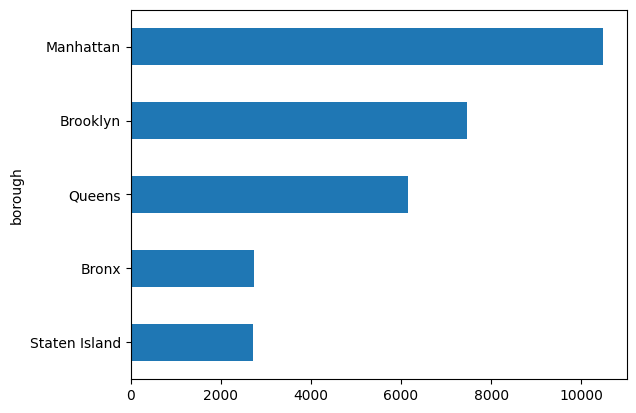

In [303]:
(
    df_merged
    .groupby('borough')
    ['borough'].count()
    .sort_values(ascending=False)
    [::-1].plot(kind="barh")
)

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [315]:
df_merged2 = pd.read_csv("boro_population.csv")

In [316]:
df_merged2.dtypes

borough       object
population     int64
area_sqmi      int64
dtype: object

In [317]:
df_merged_2 = df_merged.merge(df_merged2, left_on='borough', right_on='borough', how='left')

In [318]:
df_merged_2.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,License Issued Date,License Expired Date,Birth Year,Age,neighborhood,zip,borough,monochrome,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,black,NaN,2007-11-01,Yes,...,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan,True,1644518.0,23.0
1,10461,Indie Zephir,M,Rottweiler,NaN,black,TAN,NaN,2013-04-01,No,...,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx,True,1455444.0,42.0
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan,False,1644518.0,23.0
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,white,NaN,2008-04-01,Yes,...,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan,True,1644518.0,23.0
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,...,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan,True,1644518.0,23.0


In [320]:
dogs_per_borough = df_merged_2.groupby('borough')['Animal Name'].count()
dogs_per_borough.head()

borough
Bronx             2743
Brooklyn          7444
Manhattan        10465
Queens            6135
Staten Island     2725
Name: Animal Name, dtype: int64

In [327]:
dogs_per_borough_df = dogs_per_borough.reset_index(name='Dog Count')
dogs_per_borough_df.head()

,borough,Dog Count
0,Bronx,2743
1,Brooklyn,7444
2,Manhattan,10465
3,Queens,6135
4,Staten Island,2725


In [326]:
borough_population = df_merged_2.groupby('borough')['population'].max()
borough_population.head()

borough
Bronx            1455444.0
Brooklyn         2636735.0
Manhattan        1644518.0
Queens           2339150.0
Staten Island     474558.0
Name: population, dtype: float64

In [329]:
borough_population_df = borough_population.reset_index(name='Population')
borough_population_df.head()

,borough,Population
0,Bronx,1455444.0
1,Brooklyn,2636735.0
2,Manhattan,1644518.0
3,Queens,2339150.0
4,Staten Island,474558.0


In [331]:
dogcount_pop = dogs_per_borough_df.merge(borough_population_df, left_on='borough', right_on='borough')
dogcount_pop.head()

,borough,Dog Count,Population
0,Bronx,2743,1455444.0
1,Brooklyn,7444,2636735.0
2,Manhattan,10465,1644518.0
3,Queens,6135,2339150.0
4,Staten Island,2725,474558.0


In [339]:
dogcount_pop['Dogs per Capita'] = dogcount_pop['Dog Count'] / dogcount_pop['Population']
dogcount_pop.sort_values(by="Dogs per Capita", ascending=False).head()

,borough,Dog Count,Population,Dogs per Capita
2,Manhattan,10465,1644518.0,0.006364
4,Staten Island,2725,474558.0,0.005742
1,Brooklyn,7444,2636735.0,0.002823
3,Queens,6135,2339150.0,0.002623
0,Bronx,2743,1455444.0,0.001885


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [346]:
breed_counts = df_merged_2.groupby(['borough', 'Primary Breed']).size()

In [353]:
breed_counts = breed_counts.reset_index()

In [354]:
breed_counts.head()

,index,borough,Primary Breed,count
0,0,Bronx,Afghan Hound,1
1,1,Bronx,Akita,5
2,2,Bronx,Akita Crossbreed,2
3,3,Bronx,Alaskan Malamute,2
4,4,Bronx,American Bully,5


In [356]:
breed_counts_sorted = breed_counts.sort_values(['borough', 'count'], ascending=[True, False])

In [357]:
breed_counts_sorted.head()

,index,borough,Primary Breed,count
138,138,Bronx,Unknown,404
146,146,Bronx,Yorkshire Terrier,250
128,128,Bronx,Shih Tzu,244
41,41,Bronx,Chihuahua,208
7,7,Bronx,American Pit Bull Terrier/Pit Bull,181


In [360]:
breed_counts_sorted = breed_counts_sorted[breed_counts_sorted['Primary Breed'] != 'Unknown']

In [361]:
top_5_breeds = breed_counts_sorted.groupby('borough').head(5).reset_index(drop=True)

In [362]:
top_5_breeds

,index,borough,Primary Breed,count
0,146,Bronx,Yorkshire Terrier,250
1,128,Bronx,Shih Tzu,244
2,41,Bronx,Chihuahua,208
3,7,Bronx,American Pit Bull Terrier/Pit Bull,181
4,90,Bronx,Maltese,139
5,355,Brooklyn,Yorkshire Terrier,501
6,326,Brooklyn,Shih Tzu,481
7,199,Brooklyn,Chihuahua,391
8,263,Brooklyn,Labrador Retriever,255
9,268,Brooklyn,Maltese,247


In [374]:
pivot_data = top_5_breeds.pivot_table(index='Primary Breed', columns='borough', values='count', fill_value=0)

In [384]:
pivot_data['Total'] = pivot_data.sum(axis=1)

In [388]:
pivot_data_sorted = pivot_data.sort_values('Total', ascending=True)

In [389]:
pivot_data_sorted = pivot_data_sorted.drop(columns='Total')

<Axes: ylabel='Primary Breed'>

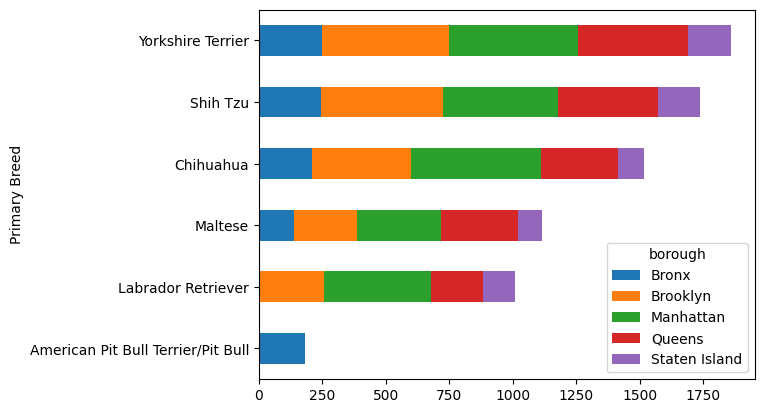

In [390]:
pivot_data_sorted.plot(kind='barh', stacked=True)

In [ ]:
#I got help from chatGPT on this last question and need more practice to understand how to do things like this better 